# Imports

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from pycm import ConfusionMatrix
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import numpy as np
import os
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
import graphviz
from IPython.display import Markdown, display
%matplotlib inline

# plt.style.use(['dark_background'])

def printmd(string):
    display(Markdown(string))

# Importing the csv files

Importing the dataset and storing it in a variable called data

In [2]:
data = pd.read_csv('./data/data.csv')

# Data Exploration

# This dataset as 21 features and 2000 entries. The meanings of the features are given below:

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has bluetooth or not
- clock_speed: speed at which microprocessor executes instructions
- dual_sim: Has dual sim support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has touch screen or not
- wifi: Has wifi or not
- price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

The above info reveals that all attributes are numerical i.e. either float or int

In [7]:
data.describe() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


The above show some basic metrics for each feature in our dataset

In [8]:
for feature in data.columns:
    mean = data[feature].mean()
    std = data[feature].std()
    treshold = std * 3
    
    lower_bound = mean - treshold
    upper_bound = mean + treshold
    
    data = data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

In [9]:
data.shape

(1988, 21)

Also we can see that 12 entries were removed in the process of removing the outliers.

## Correlation Matrix and Heatmap

The following code finds the correlation matrix of our dataset and plots a heatmap of it

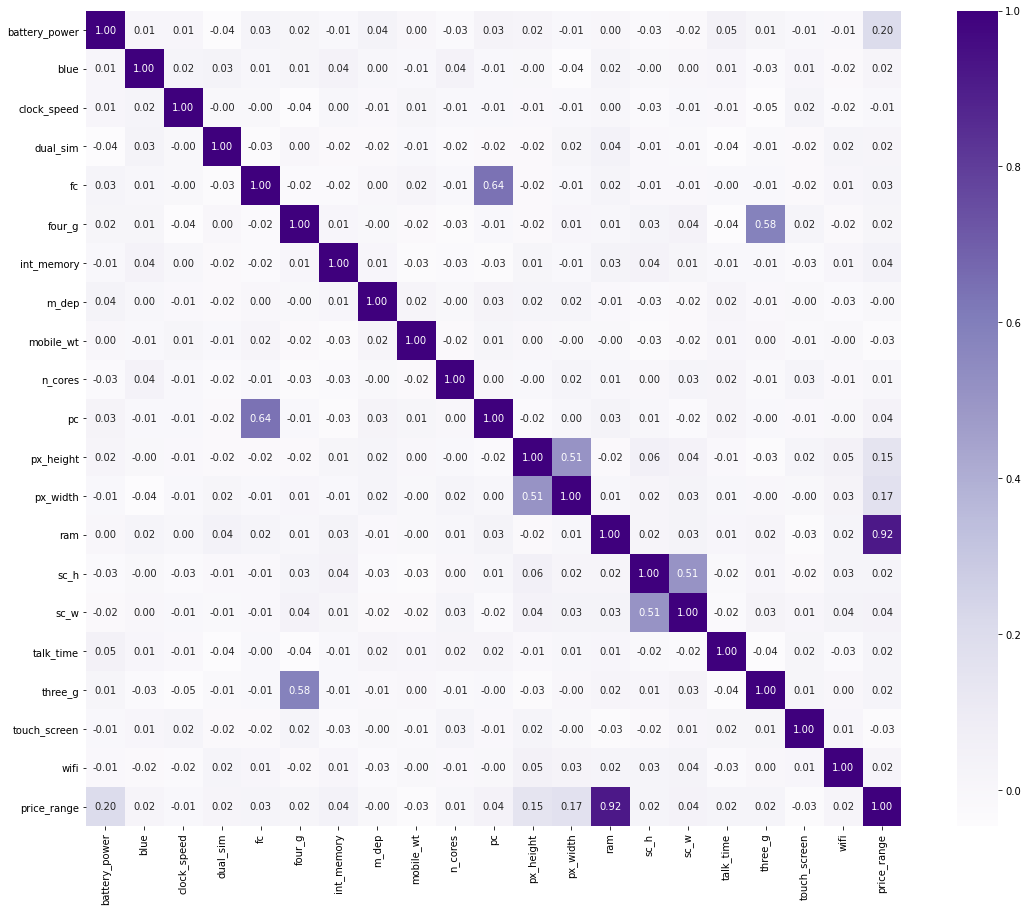

In [10]:
corr_matrix = data.corr()
# increases the resolution of the plot
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, square=True, cmap='Purples', annot=True, fmt='.2f')
plt.show()

The above correlation matrix shows how our Price Range has a very strong correlation with RAM.

Also

* 3G and 4G
* pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)
* px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)
* sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)
features have highly positive correlation.

In [11]:
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
m_dep           -0.001570
clock_speed     -0.006042
mobile_wt       -0.031180
touch_screen    -0.031501
Name: price_range, dtype: float64

ram has the highest positive correlation with the price_range of a positive 0.917, which implies the price_range is directly proportional to the ram and as the ram increases the price_range increases

The abs function will get the absolute values i.e. only the magnitude for the correlation matrix which will help me better understand the magnitude for the correlation between various features

In [12]:
corr_matrix_abs = data.corr().abs()
corr_matrix_abs['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916742
battery_power    0.201768
px_width         0.167571
px_height        0.150439
int_memory       0.044144
sc_w             0.037836
pc               0.036343
touch_screen     0.031501
mobile_wt        0.031180
fc               0.027334
sc_h             0.024294
three_g          0.023952
talk_time        0.020810
dual_sim         0.019325
wifi             0.018434
blue             0.018009
four_g           0.015254
n_cores          0.007159
clock_speed      0.006042
m_dep            0.001570
Name: price_range, dtype: float64

## Cleaning the Data

In [13]:
# To check for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
# calculate the sum of duplicate rows
print(data.duplicated().sum())

0


The above results show that there are no null/duplicate values in the data set, also all values are numeric.

However, on further inspection of the data, I found out that some values for features like px_height (height of phone in pixels) and sc_w (width of the screen) were 0 which didn't really make sense, therefore, I decided to replace these "0" values with the median of the feature.

In [15]:
data[data['px_height'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [16]:
data['sc_w'].median()

5.0

In [17]:
data[data['sc_w'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [18]:
data[data['sc_w'] == 0].shape[0]

180

There are 180 rows in the dataset where the sc_w feature is 0, therefore, I replaced these values with the median of the feature.

In [19]:
data['sc_w'] = data['sc_w'].replace(0,data['sc_w'].mean())

In [20]:
data[data['sc_w'] == 0].shape[0]

0

In [21]:
data['px_height'].median()

564.0

In [22]:
data[data['px_height'] == 0].shape[0]

2

There are 2 rows in the dataset where the px_height feature is 0, therefore, I replaced these values with the median of the feature.

In [23]:
data['px_height'] = data['px_height'].replace(0,data['px_height'].median())

In [24]:
data[data['px_height'] == 0].shape[0]

0

In [25]:
data.reset_index(inplace=True, drop=True)

## Splitting the data into testing and training data sets using the train_test_split function from sklearn

In [26]:
X = data.drop(columns=['price_range'])
y = data['price_range']

In [27]:
scale = StandardScaler()
X=scale.fit_transform(X)

In [28]:
# https://stackoverflow.com/a/59326862

# A custom function to plot the ROC curve and calculate the AUC

def plot_multiclass_roc(y_prob, X_test, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
# Function to calculate various metrics using the confusion matrix and a library called pycm

def metrics(y_test, y_pred, cnf_matrix, model, X_test, choice):

    n_classes = len(y_test.unique())

    if choice==1:
        y_prob = model.decision_function(X_test)
    elif choice==2:
        y_prob = model.predict_proba(X_test)

    cm = ConfusionMatrix(np.array(y_test), np.array(y_pred))
    metric_strings = []
    # Model Accuracy, how often is the classifier correct?
    metric_strings.append(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

    # Model Precision
    metric_strings.append(f"Precision (weighted): {precision_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Precision (micro): {precision_score(y_test, y_pred, average='micro'):.3f}")

    # Model Recall
    metric_strings.append(f"Recall (weighted): {recall_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"Recall (micro): {recall_score(y_test, y_pred, average='micro'):.3f}")

    # Model F1 Score
    metric_strings.append(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")
    metric_strings.append(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.3f}")
    metric_strings.append(f"F1 Score (micro): {f1_score(y_test, y_pred, average='micro'):.3f}")

    # Mean Squared Error
    metric_strings.append(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

    # Mean Absolute Error
    metric_strings.append(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")

    metrics = cm.class_stat
    
    table_metrics = 'TPR FPR TNR FNR ERR ACC F1 AUC'.split()

    markdown = '| Metric | 0 | 1 | 2 | 3 |\n| ----------- | ----------- | ----------- | ----------- | ----------- |\n'
    for metric in table_metrics:
        markdown += '| ' + metric + ' | '
        for i in range(n_classes):
            markdown += f'{metrics[metric][i]:.3f} | '
        markdown += '\n'

    # ROC AUC Score
    if choice==2:
        metric_strings.append(f"ROC AUC Score: {roc_auc_score(y_test, y_prob, multi_class='ovo'):.3f}")

    output = ""
    for metric in metric_strings:
        output += "## " + metric + "\n"
    
    printmd(output)

    # Model Classification Report
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Model Confusion Matrix
    print("Confusion Matrix:\n", cnf_matrix)

    printmd(markdown)

    plt.figure(figsize=(10, 7))
    sns.heatmap(cnf_matrix)
    plt.show()

    plot_multiclass_roc(y_prob, X_test, y_test, n_classes=n_classes, figsize=(8, 8))

In [29]:
from sklearn.linear_model import Perceptron, LogisticRegressionCV
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import hard_sigmoid
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(Perceptron(max_iter=2000, tol=None, random_state=0,n_jobs=-1), X, y, cv=10)
print(scores)
print(sum(scores) / len(scores))

[0.74874372 0.78894472 0.8040201  0.7638191  0.75879397 0.77889447
 0.79396985 0.79899497 0.74242424 0.75757576]
0.7736180904522614


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y)
model = Perceptron(max_iter=2000, tol=None, random_state=0,n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
sklearn.metrics.accuracy_score(y_pred, y_test)

0.7964824120603015

In [32]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

## Accuracy: 0.796
## Precision (weighted): 0.801
## Precision (macro): 0.801
## Precision (micro): 0.796
## Recall (weighted): 0.796
## Recall (macro): 0.796
## Recall (micro): 0.796
## F1 Score (weighted): 0.794
## F1 Score (macro): 0.794
## F1 Score (micro): 0.796
## Mean Squared Error: 0.204
## Mean Absolute Error: 0.204


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.59      0.74      0.66       100
           2       0.63      0.48      0.55        99
           3       0.99      0.97      0.98       100

    accuracy                           0.80       398
   macro avg       0.80      0.80      0.79       398
weighted avg       0.80      0.80      0.79       398

Confusion Matrix:
 [[98  1  0  0]
 [ 1 74 25  0]
 [ 0 50 48  1]
 [ 0  0  3 97]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.990 | 0.740 | 0.485 | 0.970 | 
| FPR | 0.003 | 0.171 | 0.094 | 0.003 | 
| TNR | 0.997 | 0.829 | 0.906 | 0.997 | 
| FNR | 0.010 | 0.260 | 0.515 | 0.030 | 
| ERR | 0.005 | 0.193 | 0.198 | 0.010 | 
| ACC | 0.995 | 0.807 | 0.802 | 0.990 | 
| F1 | 0.990 | 0.658 | 0.549 | 0.980 | 
| AUC | 0.993 | 0.784 | 0.696 | 0.983 | 


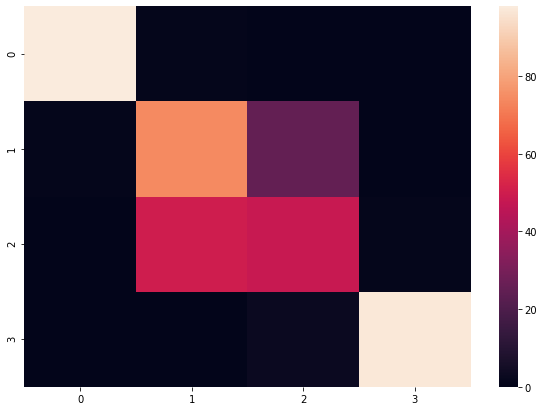

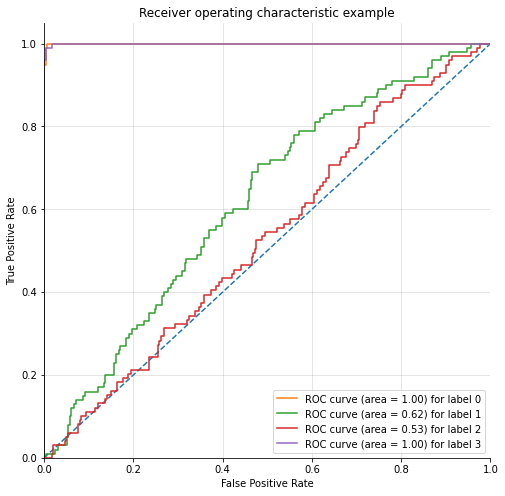

In [33]:
metrics(y_test, y_pred, cnf_matrix, model, X_test, 1)

In [34]:
model = LogisticRegressionCV(cv=5, random_state=0, max_iter=5000).fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9748743718592965

In [36]:
cnf_matrix = confusion_matrix(y_test, y_pred)

## Accuracy: 0.975
## Precision (weighted): 0.975
## Precision (macro): 0.975
## Precision (micro): 0.975
## Recall (weighted): 0.975
## Recall (macro): 0.975
## Recall (micro): 0.975
## F1 Score (weighted): 0.975
## F1 Score (macro): 0.975
## F1 Score (micro): 0.975
## Mean Squared Error: 0.025
## Mean Absolute Error: 0.025
## ROC AUC Score: 0.999


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.97      0.96      0.96       100
           2       0.96      0.95      0.95        99
           3       0.98      0.99      0.99       100

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398

Confusion Matrix:
 [[99  0  0  0]
 [ 1 96  3  0]
 [ 0  3 94  2]
 [ 0  0  1 99]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 1.000 | 0.960 | 0.949 | 0.990 | 
| FPR | 0.003 | 0.010 | 0.013 | 0.007 | 
| TNR | 0.997 | 0.990 | 0.987 | 0.993 | 
| FNR | 0.000 | 0.040 | 0.051 | 0.010 | 
| ERR | 0.003 | 0.018 | 0.023 | 0.008 | 
| ACC | 0.997 | 0.982 | 0.977 | 0.992 | 
| F1 | 0.995 | 0.965 | 0.954 | 0.985 | 
| AUC | 0.998 | 0.975 | 0.968 | 0.992 | 


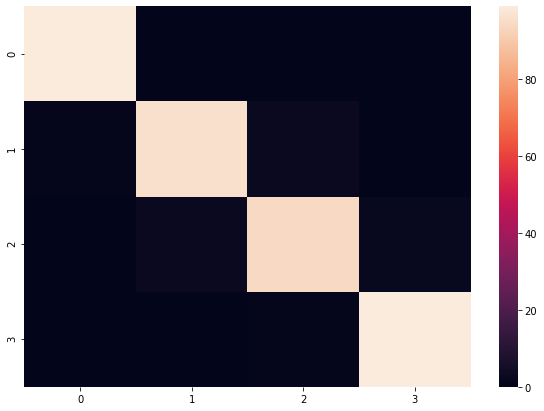

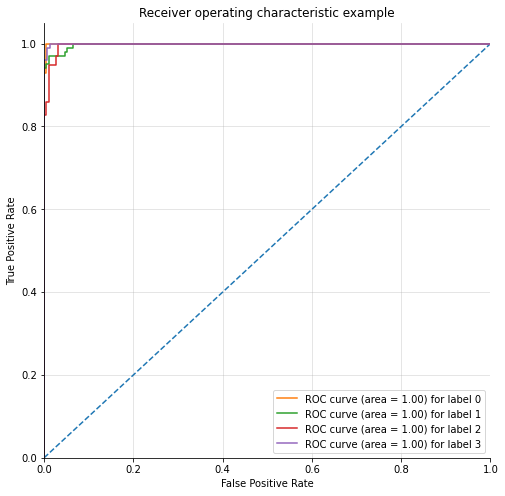

In [37]:
metrics(y_test, y_pred, cnf_matrix, model, X_test, 2)

<img src="4.png" />

For multiclass classifications, the linear classifiers divide the problem into multiple binary classification problems and then use a voting scheme to combine the predictions of the binary classifiers.

## Accuracy: 0.764
## Precision (weighted): 0.764
## Precision (macro): 0.764
## Precision (micro): 0.764
## Recall (weighted): 0.764
## Recall (macro): 0.764
## Recall (micro): 0.764
## F1 Score (weighted): 0.764
## F1 Score (macro): 0.764
## F1 Score (micro): 0.764
## Mean Squared Error: 0.236
## Mean Absolute Error: 0.236


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       0.54      0.55      0.55       100
           2       0.53      0.53      0.53        99
           3       0.99      0.98      0.98       100

    accuracy                           0.76       398
   macro avg       0.76      0.76      0.76       398
weighted avg       0.76      0.76      0.76       398

Confusion Matrix:
 [[99  0  0  0]
 [ 1 55 44  0]
 [ 0 46 52  1]
 [ 0  0  2 98]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 1.000 | 0.550 | 0.525 | 0.980 | 
| FPR | 0.003 | 0.154 | 0.154 | 0.003 | 
| TNR | 0.997 | 0.846 | 0.846 | 0.997 | 
| FNR | 0.000 | 0.450 | 0.475 | 0.020 | 
| ERR | 0.003 | 0.229 | 0.234 | 0.008 | 
| ACC | 0.997 | 0.771 | 0.766 | 0.992 | 
| F1 | 0.995 | 0.547 | 0.528 | 0.985 | 
| AUC | 0.998 | 0.698 | 0.686 | 0.988 | 


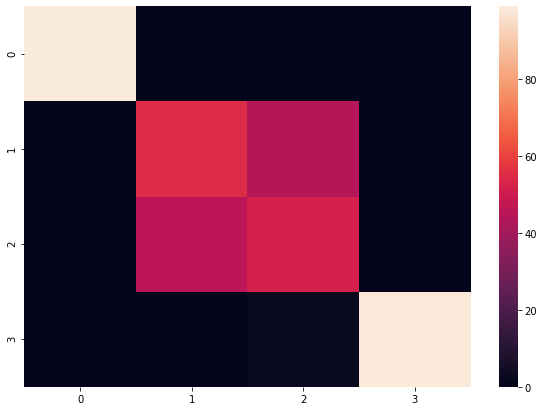

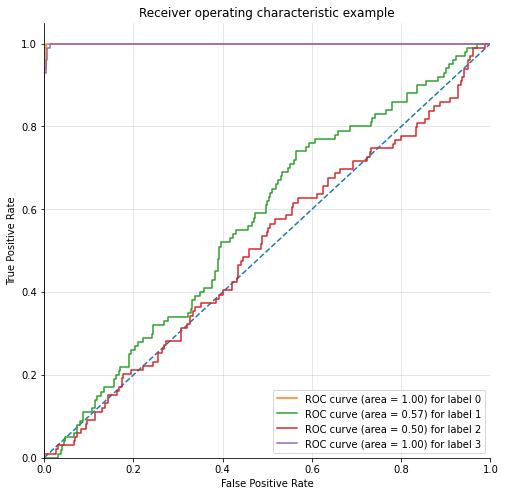

In [91]:
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y)
model = Perceptron(max_iter=2000, tol=None, random_state=0,n_jobs=-1)
model.fit(X_train, y_train)

ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)

y_pred = ovr.predict(X_test)

metrics(y_test, y_pred, confusion_matrix(y_test,y_pred) , ovr, X_test, 1)

## Accuracy: 0.955
## Precision (weighted): 0.955
## Precision (macro): 0.955
## Precision (micro): 0.955
## Recall (weighted): 0.955
## Recall (macro): 0.955
## Recall (micro): 0.955
## F1 Score (weighted): 0.955
## F1 Score (macro): 0.955
## F1 Score (micro): 0.955
## Mean Squared Error: 0.045
## Mean Absolute Error: 0.045


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.93      0.95      0.94       100
           2       0.92      0.93      0.92        99
           3       0.99      0.95      0.97       100

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398

Confusion Matrix:
 [[98  1  0  0]
 [ 2 95  3  0]
 [ 0  6 92  1]
 [ 0  0  5 95]]


| Metric | 0 | 1 | 2 | 3 |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| TPR | 0.990 | 0.950 | 0.929 | 0.950 | 
| FPR | 0.007 | 0.023 | 0.027 | 0.003 | 
| TNR | 0.993 | 0.977 | 0.973 | 0.997 | 
| FNR | 0.010 | 0.050 | 0.071 | 0.050 | 
| ERR | 0.008 | 0.030 | 0.038 | 0.015 | 
| ACC | 0.992 | 0.970 | 0.962 | 0.985 | 
| F1 | 0.985 | 0.941 | 0.925 | 0.969 | 
| AUC | 0.992 | 0.963 | 0.951 | 0.973 | 


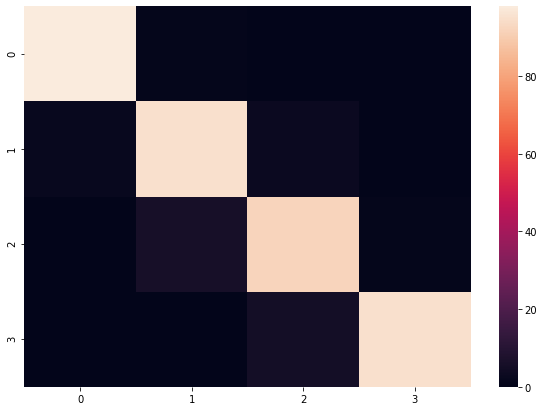

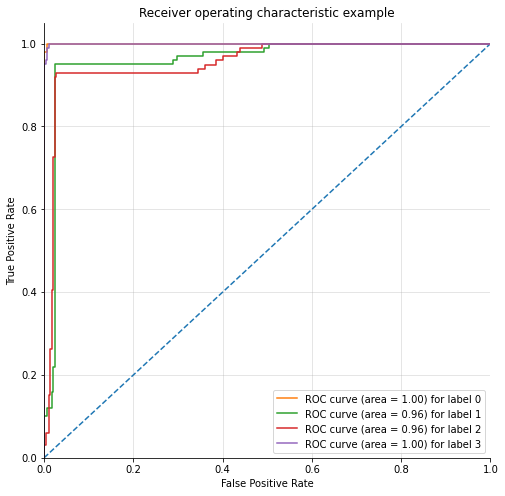

In [94]:
from sklearn.multiclass import OneVsOneClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y)
model = Perceptron(max_iter=2000, tol=None, random_state=0,n_jobs=-1)
model.fit(X_train, y_train)

ovo = OneVsOneClassifier(model)
ovo.fit(X_train, y_train)

y_pred = ovo.predict(X_test)

metrics(y_test, y_pred, confusion_matrix(y_test,y_pred) , ovo, X_test, 1)

- The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.
- The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.